## 26th January 2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn

Second Attempt at Linear Regressing on Heart CSV from Kaggle

## Heart CSV Project


---



1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [ ]:
DATA_URL = "/content/heart.csv"
df = pd.read_csv(DATA_URL)
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


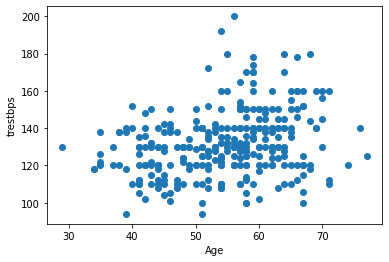

In [ ]:
x = df.loc[:,"age"]
y = df.loc[:,"trestbps"]
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()

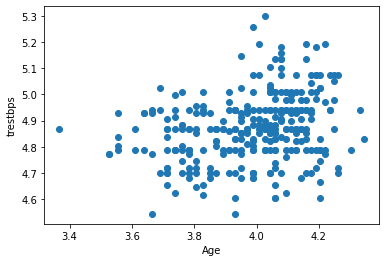

In [ ]:
X2 = np.log(x)
y = np.log(y)
plt.scatter(X2,y)
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()


In [ ]:
X2, y = X2.to_numpy(), y.to_numpy()
X2, y = X2.reshape(303,1), y.reshape(303,1)
print(X2.shape)
print(y.shape)

(303, 1)
(303, 1)


In [ ]:
def train_val_test(dataset):
  return np.split(dataset,[int(dataset.shape[0] * 0.6),int(dataset.shape[0] * 0.9)])

X_train ,X_val, X_test = train_val_test(X2) 
print(f'X_train:'+str(X_train.shape))
print(f'X_val'+str(X_val.shape))
print(f'X_test'+str(X_test.shape))
y_train ,y_val, y_test = train_val_test(y)
print(f'X_train:'+str(y_train.shape))
print(f'X_val'+str(y_val.shape))
print(f'X_test'+str(y_test.shape)) 

X_train:(181, 1)
X_val(91, 1)
X_test(31, 1)
X_train:(181, 1)
X_val(91, 1)
X_test(31, 1)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
w = model.coef_ 
b = model.intercept_
print(w)

[[0.1800512]]


In [ ]:
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)

print(f'Training Set MSE:',sklearn.metrics.mean_squared_error(y_train,yhat_train))
print(f'Validation Set MSE:',sklearn.metrics.mean_squared_error(y_val,yhat_val))

Training Set MSE: 0.01381985536929062
Validation Set MSE: 0.02002567357095851


In [ ]:
yhat_test = model.predict(X_test)
print(f'Training Set MSE:',sklearn.metrics.mean_squared_error(y_test,yhat_test))

Training Set MSE: 0.014581201775844708
